# Линейная регрессия — Предсказание качества вина

**Линейная регрессия** — один из фундаментальных методов машинного обучения, который моделирует
зависимость целевой переменной от набора признаков в виде линейной комбинации этих признаков.

## Импорт библиотек

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
)

import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 11

print('Все библиотеки успешно импортированы.')

Все библиотеки успешно импортированы.


## Загрузка и описание датасета

In [26]:
# Загрузка данных (датасет: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009)
df = pd.read_csv('./winequality-red.csv')

print(f'Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов\n')
print('Первые 10 строк:')
df.head(10)

Размер датасета: 1599 строк, 12 столбцов

Первые 10 строк:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [27]:
print('Информация о датасете:')
print(df.info())
print('\nСтатистическое описание:')
df.describe().round(3)

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

Статистическое описание:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000
mean,8.320,0.528,0.271,2.539,0.087,15.875,46.468,0.997,3.311,0.658,10.423,5.636
std,1.741,0.179,0.195,1.410,0.047,10.460,32.895,0.002,0.154,0.170,1.066,0.808
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.400,3.000
25%,7.100,0.390,0.090,1.900,0.070,7.000,22.000,0.996,3.210,0.550,9.500,5.000
50%,7.900,0.520,0.260,2.200,0.079,14.000,38.000,0.997,3.310,0.620,10.200,6.000
75%,9.200,0.640,0.420,2.600,0.090,21.000,62.000,0.998,3.400,0.730,11.100,6.000
max,15.900,1.580,1.000,15.500,0.611,72.000,289.000,1.004,4.010,2.000,14.900,8.000


Распределение оценок качества вина:
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


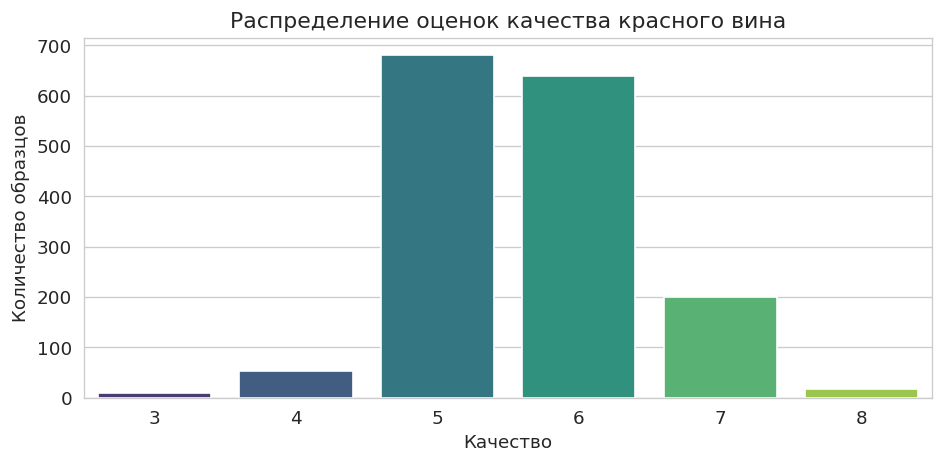

In [28]:
print('Распределение оценок качества вина:')
print(df['quality'].value_counts().sort_index())

plt.figure(figsize=(8, 4))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title('Распределение оценок качества красного вина')
plt.xlabel('Качество')
plt.ylabel('Количество образцов')
plt.tight_layout()
plt.show()

## Предварительная обработка данных

In [29]:
# 1. Проверка пропущенных значений
print('Пропущенные значения по столбцам:')
print(df.isnull().sum())
print(f'\nОбщее количество пропусков: {df.isnull().sum().sum()}')

Пропущенные значения по столбцам:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Общее количество пропусков: 0


In [30]:
# 2. Проверка дубликатов
duplicates = df.duplicated().sum()
print(f'\nКоличество дубликатов: {duplicates}')
if duplicates > 0:
    df = df.drop_duplicates()
    print(f'После удаления дубликатов: {df.shape[0]} строк')


Количество дубликатов: 240
После удаления дубликатов: 1359 строк


In [31]:
# 3. Разделение на признаки и целевую переменную
X = df.drop('quality', axis=1)
y = df['quality']

print(f'\nПризнаки (X): {X.shape}')
print(f'Целевая переменная (y): {y.shape}')
print(f'\nСписок признаков: {list(X.columns)}')


Признаки (X): (1359, 11)
Целевая переменная (y): (1359,)

Список признаков: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [32]:
# 4. Бинаризация целевой переменной для классификационных метрик
# Качество >= 7 → 1 (хорошее вино), иначе → 0 (обычное вино)
y_binary = (y >= 7).astype(int)

print('Распределение бинарных классов:')
print(y_binary.value_counts())
print(f'\nДоля «хорошего» вина: {y_binary.mean():.2%}')

Распределение бинарных классов:
quality
0    1175
1     184
Name: count, dtype: int64

Доля «хорошего» вина: 13.54%


In [33]:
# 5. Разбиение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test, y_bin_train, y_bin_test = train_test_split(
    X, y, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

print(f'Обучающая выборка: {X_train.shape[0]} образцов')
print(f'Тестовая выборка:  {X_test.shape[0]} образцов')

Обучающая выборка: 1087 образцов
Тестовая выборка:  272 образцов


In [34]:
# 6. Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('\nМасштабирование выполнено (StandardScaler).')
print(f'Среднее по обучающей выборке (после): {X_train_scaled.mean(axis=0).round(2)}')


Масштабирование выполнено (StandardScaler).
Среднее по обучающей выборке (после): [ 0.  0.  0. -0. -0.  0. -0. -0.  0.  0. -0.]


## Тепловая карта корреляций

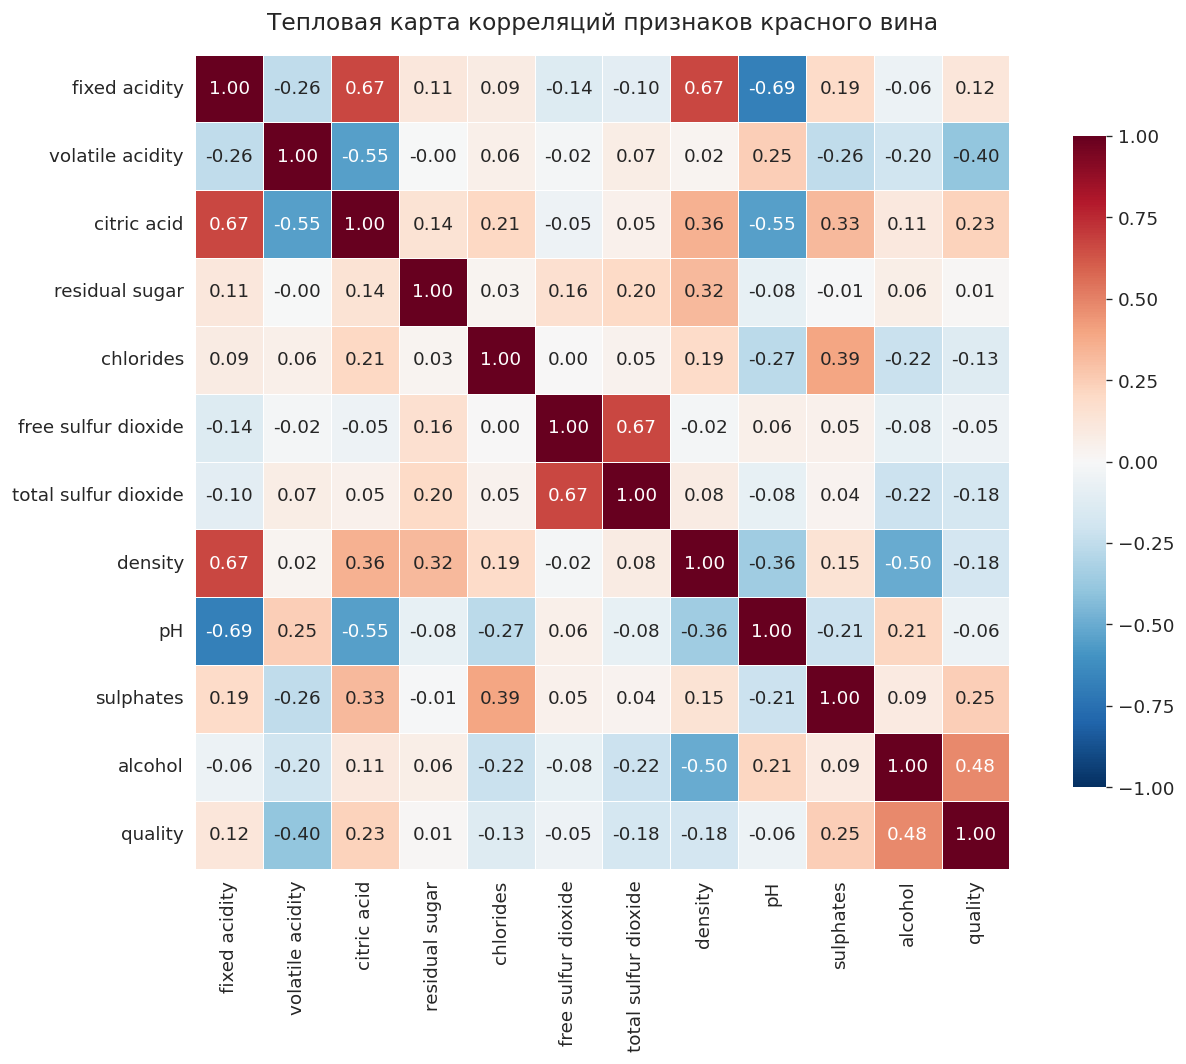

In [74]:
plt.figure(figsize=(12, 9))
corr_matrix = df.corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='RdBu_r',
    center=0,
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)
plt.title('Тепловая карта корреляций признаков красного вина', fontsize=14, pad=15)
plt.tight_layout()
plt.show()

In [36]:
# Корреляция признаков с целевой переменной
print('\nКорреляция признаков с качеством вина (по убыванию модуля):')
quality_corr = corr_matrix['quality'].drop('quality').abs().sort_values(ascending=False)
for feat, val in quality_corr.items():
    sign = '+' if corr_matrix.loc[feat, 'quality'] > 0 else '-'
    print(f'  {feat:30s} {sign}{val:.3f}')


Корреляция признаков с качеством вина (по убыванию модуля):
  alcohol                        +0.480
  volatile acidity               -0.395
  sulphates                      +0.249
  citric acid                    +0.228
  density                        -0.184
  total sulfur dioxide           -0.178
  chlorides                      -0.131
  fixed acidity                  +0.119
  pH                             -0.055
  free sulfur dioxide            -0.050
  residual sugar                 +0.014


## Обучение моделей

In [42]:
# 1. LinearRegression
from sklearn.model_selection import GridSearchCV

# param_grid_lr = {
#     'fit_intercept': [True, False],
#     'positive': [True, False],
# }
param_grid_lr = {
    'fit_intercept': [True],
    'positive': [False],
}

lr_base=LinearRegression()

gs_lr = GridSearchCV(
    estimator=lr_base,
    param_grid=param_grid_lr,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=5,
)
gs_lr.fit(X_train_scaled, y_train)

lr = gs_lr.best_estimator_
print('✅ LinearRegression — обучена')
print(f'   Лучшие параметры: {gs_lr.best_params_}')
print(f'   Лучший R² (CV):   {gs_lr.best_score_:.4f}\n')

Fitting 3 folds for each of 4 candidates, totalling 12 fits
✅ LinearRegression — обучена
   Лучшие параметры: {'fit_intercept': True, 'positive': False}
   Лучший R² (CV):   0.3498



In [73]:
# 2. SGDRegressor

# param_grid_sgd = {
#     'penalty': ['l2', 'l1', 'elasticnet'],
#     'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1],
#     'eta0': [0.001, 0.01, 0.1],
#     'tol': [1e-3, 1e-4],
#     'l1_ratio': [0.15, 0.5, 0.85],
# }
param_grid_sgd = {
    'penalty': ['elasticnet'],
    'alpha': [0.01],
    'eta0': [0.01],
    'tol': [1e-3],
    'l1_ratio': [0.5],
}

sgd_base = SGDRegressor(
    max_iter=1000,
    learning_rate='adaptive',
    random_state=42,
    early_stopping=True,
    n_iter_no_change=10,
)

gs_sgd = GridSearchCV(
    estimator=sgd_base,
    param_grid=param_grid_sgd,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=5,
)
gs_sgd.fit(X_train_scaled, y_train)

sgd = gs_sgd.best_estimator_
print('✅ SGDRegressor — обучена')
print(f'   Лучшие параметры: {gs_sgd.best_params_}')
print(f'   Лучший R² (CV):   {gs_sgd.best_score_:.4f}\n')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
✅ SGDRegressor — обучена
   Лучшие параметры: {'alpha': 0.01, 'eta0': 0.01, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'tol': 0.001}
   Лучший R² (CV):   0.3517



In [47]:
# 3. Ridge

# param_grid_ridge = {
#     'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0],
#     'fit_intercept': [True, False],
#     'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga'],
# }
param_grid_ridge = {
    'alpha': [50.0],
    'fit_intercept': [True],
    'solver': ['saga'],
}

ridge_base=Ridge(random_state=42)

gs_ridge = GridSearchCV(
    estimator=ridge_base,
    param_grid=param_grid_ridge,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=5,
)
gs_ridge.fit(X_train_scaled, y_train)

ridge = gs_ridge.best_estimator_
print('✅ Ridge — обучена')
print(f'   Лучшие параметры: {gs_ridge.best_params_}')
print(f'   Лучший R² (CV):   {gs_ridge.best_score_:.4f}\n')

Fitting 3 folds for each of 108 candidates, totalling 324 fits
✅ Ridge — обучена
   Лучшие параметры: {'alpha': 50.0, 'fit_intercept': True, 'solver': 'saga'}
   Лучший R² (CV):   0.3521



In [48]:
# Сводка
models = {'LinearRegression': lr, 'SGDRegressor': sgd, 'Ridge': ridge}

coef_df = pd.DataFrame(
    {name: model.coef_ for name, model in models.items()},
    index=X.columns
)
coef_df['Признак'] = coef_df.index
print('--- Коэффициенты моделей ---')
coef_df

--- Коэффициенты моделей ---


,LinearRegression,SGDRegressor,Ridge,Признак
fixed acidity,-0.009749,0.000000,0.025588,fixed acidity
volatile acidity,-0.202071,-0.201357,-0.190574,volatile acidity
citric acid,-0.014517,0.000000,-0.000394,citric acid
residual sugar,-0.003241,0.000000,0.007732,residual sugar
chlorides,-0.080025,-0.071237,-0.076894,chlorides
free sulfur dioxide,0.041279,0.032279,0.033845,free sulfur dioxide
total sulfur dioxide,-0.109300,-0.105410,-0.102194,total sulfur dioxide
density,0.010027,0.000000,-0.029791,density
pH,-0.095748,-0.076514,-0.067790,pH
sulphates,0.137805,0.131937,0.137234,sulphates


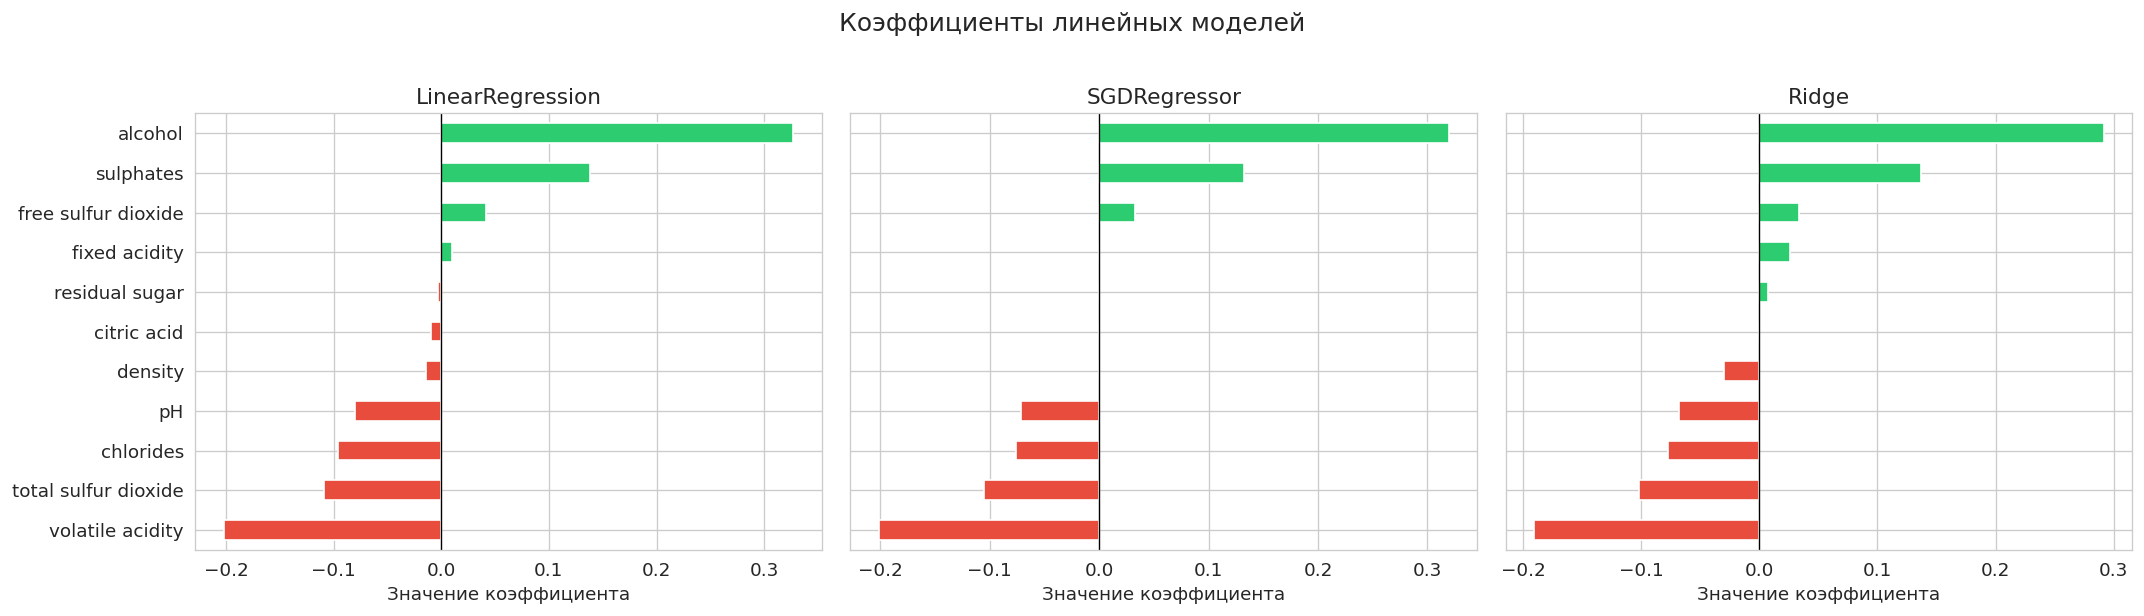

In [49]:
# Визуализация коэффициентов
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for ax, (name, model) in zip(axes, models.items()):
    coefs = pd.Series(model.coef_, index=X.columns).sort_values()
    colors = ['#e74c3c' if c < 0 else '#2ecc71' for c in coefs]
    coefs.plot.barh(ax=ax, color=colors)
    ax.set_title(name, fontsize=13)
    ax.set_xlabel('Значение коэффициента')
    ax.axvline(0, color='black', linewidth=0.8)

fig.suptitle('Коэффициенты линейных моделей', fontsize=15, y=1.02)
plt.tight_layout()
plt.show()

## Прогнозы моделей

In [57]:
y_pred_lr = lr.predict(X_test_scaled)
y_pred_sgd = sgd.predict(X_test_scaled)
y_pred_ridge = ridge.predict(X_test_scaled)

reg_results = {}
for name, y_pred in [('LinearRegression', y_pred_lr),
                      ('SGDRegressor', y_pred_sgd),
                      ('Ridge', y_pred_ridge)]:
    reg_results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R²': r2_score(y_test, y_pred),
    }

reg_df = pd.DataFrame(reg_results).T
print('--- Регрессионные метрики ---')
reg_df.round(4)

--- Регрессионные метрики ---


,MAE,MSE,RMSE,R²
LinearRegression,0.5234,0.4725,0.6874,0.3367
SGDRegressor,0.5253,0.4741,0.6886,0.3344
Ridge,0.5255,0.4725,0.6874,0.3367


## Визуализация результатов

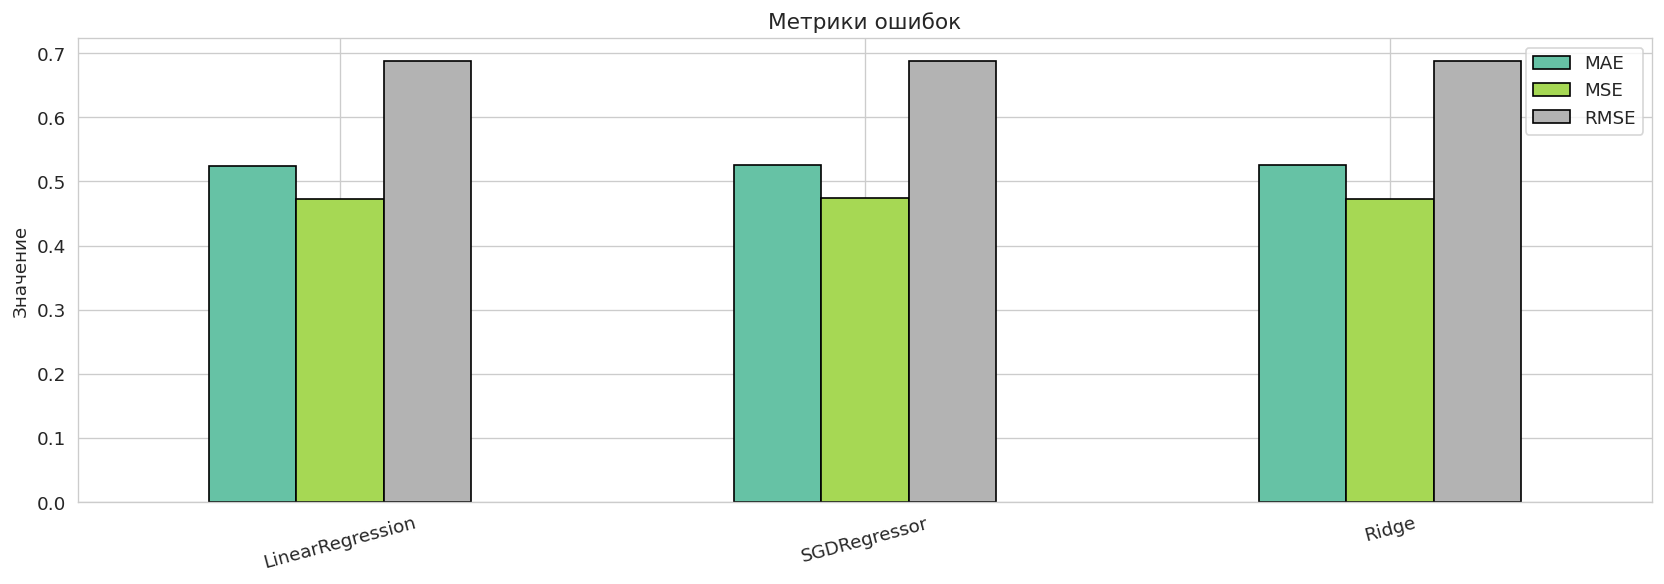

In [66]:
# === 8.1 Столбчатая диаграмма регрессионных метрик ===

fig, axes = plt.subplots(1, 1, figsize=(14, 5))

# Метрики ошибок (MAE, MSE, RMSE)
reg_df[['MAE', 'MSE', 'RMSE']].plot.bar(
    ax=axes, rot=15, colormap='Set2', edgecolor='black'
)
axes.set_title('Метрики ошибок', fontsize=13)
axes.set_ylabel('Значение')
axes.legend(loc='upper right')

plt.tight_layout()
plt.show()

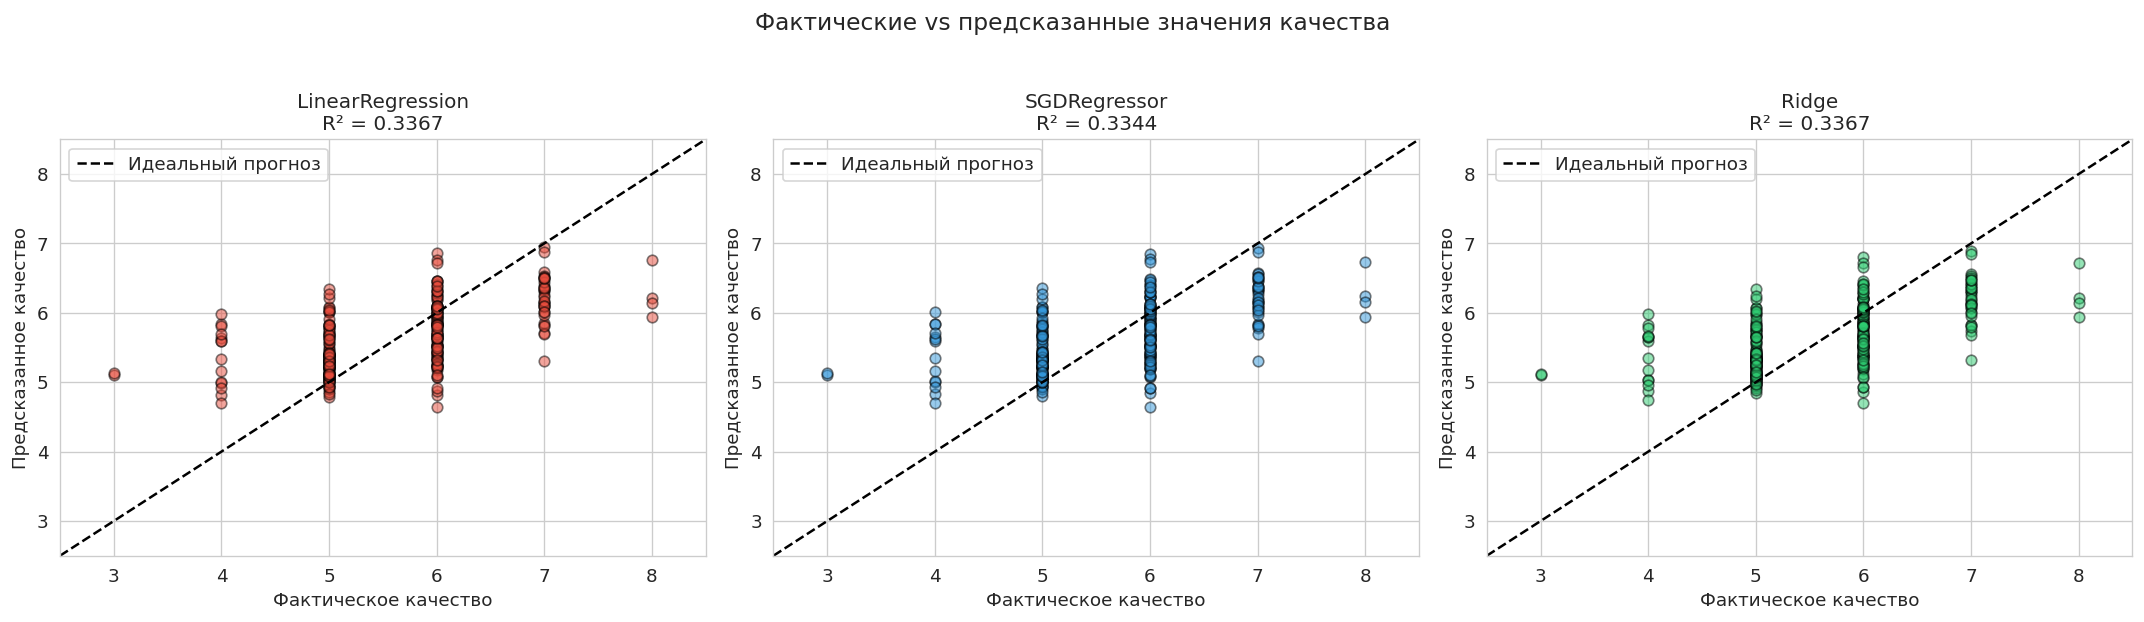

In [67]:
# === 8.2 Scatter-графики: факт vs прогноз ===

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (name, y_pred, color) in zip(axes, [
    ('LinearRegression', y_pred_lr, '#e74c3c'),
    ('SGDRegressor', y_pred_sgd, '#3498db'),
    ('Ridge', y_pred_ridge, '#2ecc71'),
]):
    ax.scatter(y_test, y_pred, alpha=0.5, color=color, edgecolor='k', s=40)

    lims = [min(y_test.min(), y_pred.min()) - 0.5,
            max(y_test.max(), y_pred.max()) + 0.5]
    ax.plot(lims, lims, 'k--', linewidth=1.5, label='Идеальный прогноз')

    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.set_xlabel('Фактическое качество')
    ax.set_ylabel('Предсказанное качество')
    ax.set_title(f'{name}\nR² = {r2_score(y_test, y_pred):.4f}', fontsize=12)
    ax.legend()

fig.suptitle('Фактические vs предсказанные значения качества', fontsize=14, y=1.03)
plt.tight_layout()
plt.show()

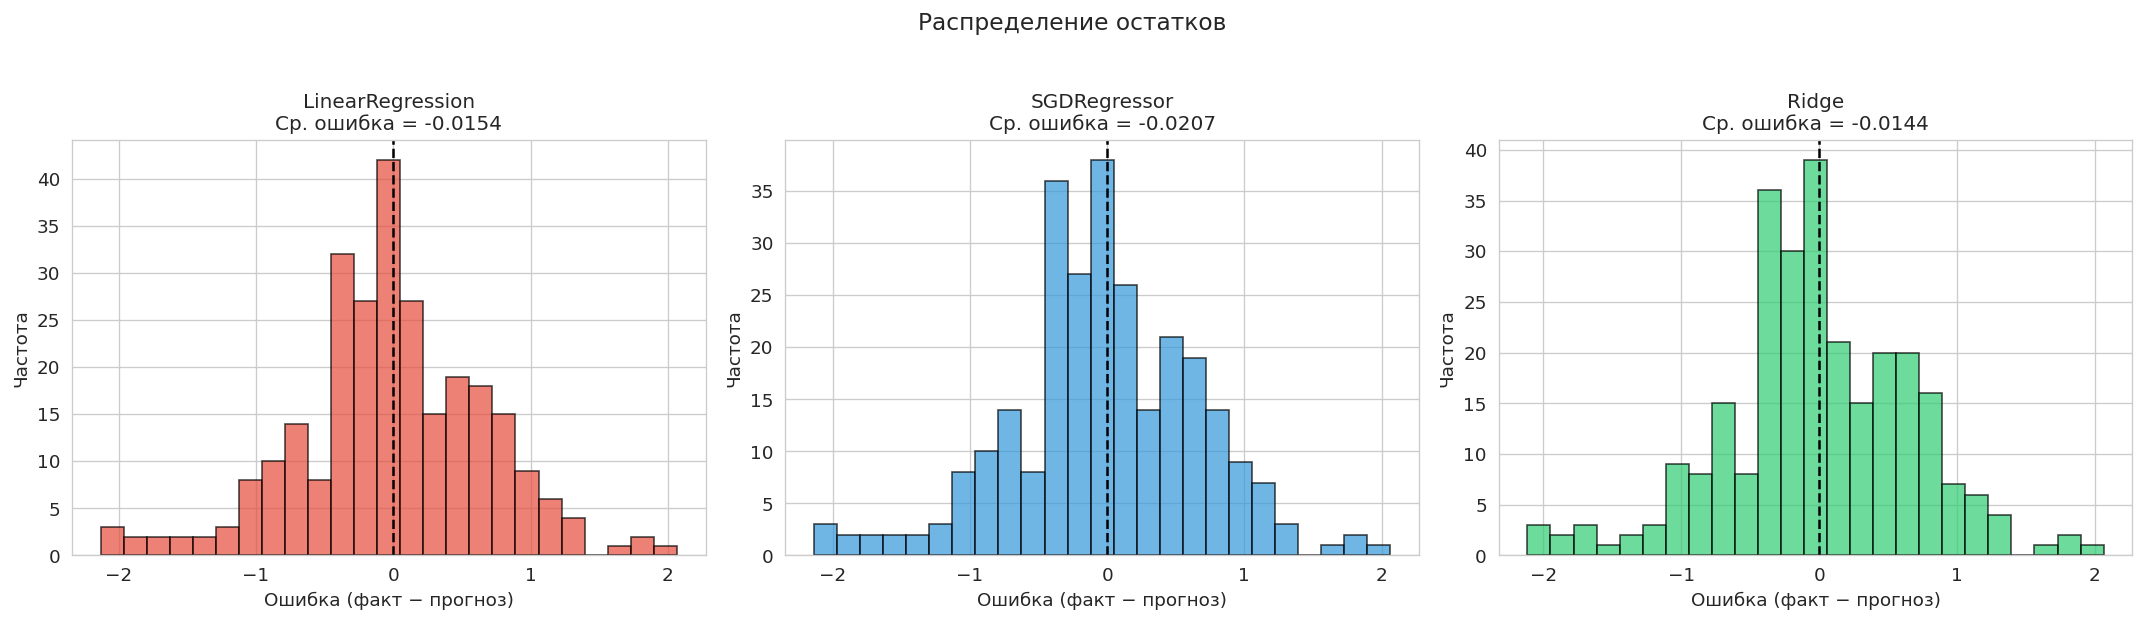

In [68]:
# === 8.3 Распределение остатков (residuals) ===

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (name, y_pred, color) in zip(axes, [
    ('LinearRegression', y_pred_lr, '#e74c3c'),
    ('SGDRegressor', y_pred_sgd, '#3498db'),
    ('Ridge', y_pred_ridge, '#2ecc71'),
]):
    residuals = y_test - y_pred
    ax.hist(residuals, bins=25, color=color, edgecolor='black', alpha=0.7)
    ax.axvline(0, color='black', linewidth=1.5, linestyle='--')
    ax.set_xlabel('Ошибка (факт − прогноз)')
    ax.set_ylabel('Частота')
    ax.set_title(f'{name}\nСр. ошибка = {residuals.mean():.4f}', fontsize=12)

fig.suptitle('Распределение остатков', fontsize=14, y=1.03)
plt.tight_layout()
plt.show()

Наиболее коррелирующий признак: alcohol


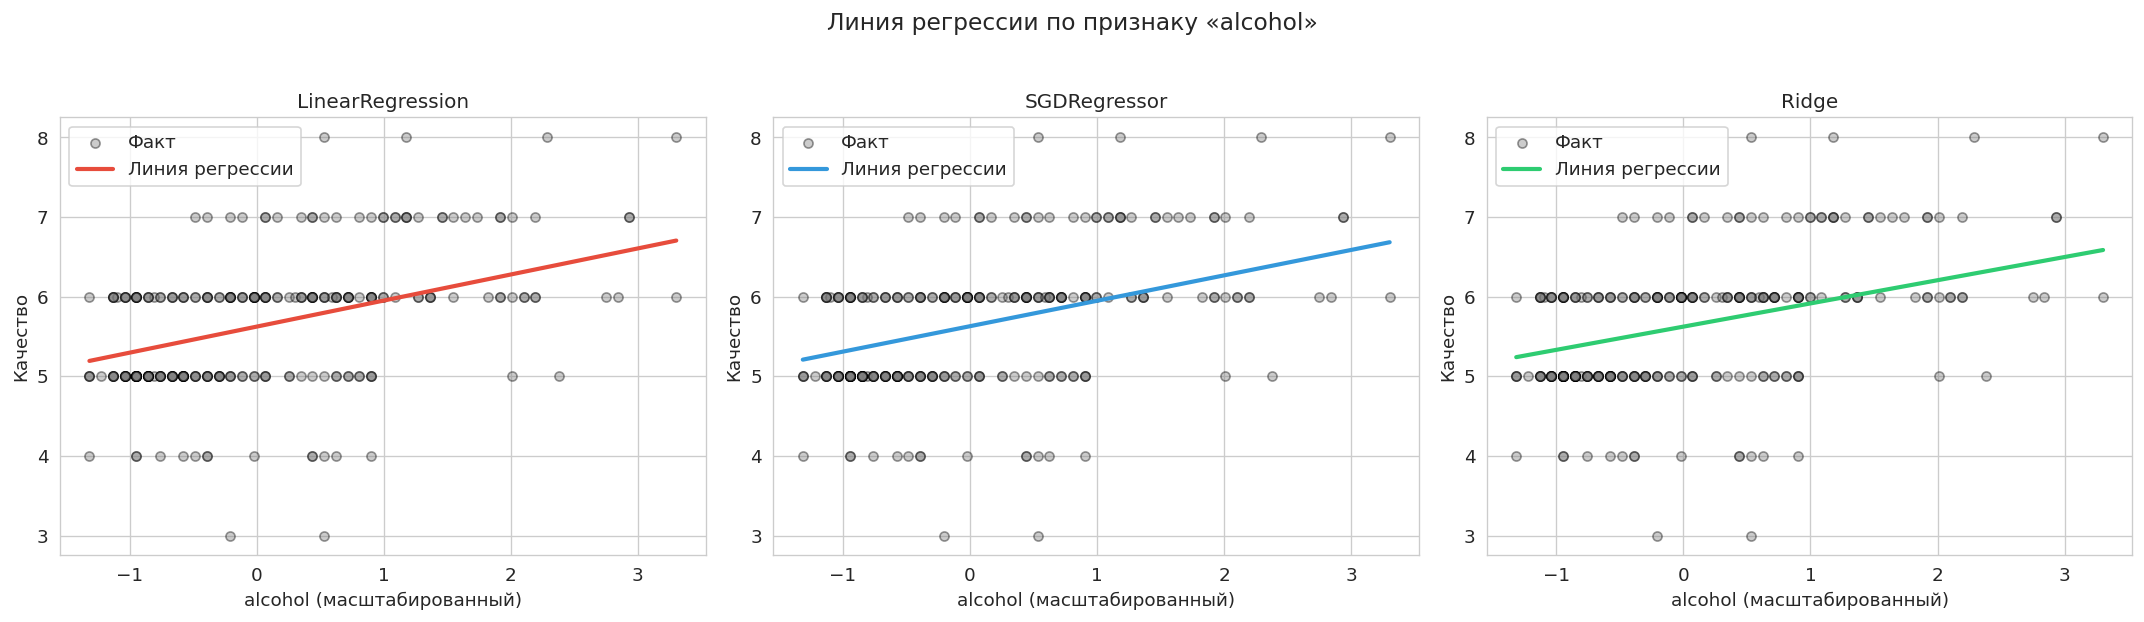

In [69]:
# === 8.4 Линия регрессии по главному признаку ===

# Выбираем признак с наибольшей корреляцией с quality
best_feature = df.drop('quality', axis=1).corrwith(df['quality']).abs().idxmax()
feat_idx = list(X.columns).index(best_feature)

print(f'Наиболее коррелирующий признак: {best_feature}')

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (name, model, color) in zip(axes, [
    ('LinearRegression', lr, '#e74c3c'),
    ('SGDRegressor', sgd, '#3498db'),
    ('Ridge', ridge, '#2ecc71'),
]):
    ax.scatter(X_test_scaled[:, feat_idx], y_test,
               alpha=0.4, color='gray', edgecolor='k', s=30, label='Факт')

    # Строим линию регрессии по одному признаку
    x_range = np.linspace(X_test_scaled[:, feat_idx].min(),
                          X_test_scaled[:, feat_idx].max(), 100)
    X_line = np.zeros((100, X_train_scaled.shape[1]))
    X_line[:, feat_idx] = x_range
    y_line = model.predict(X_line)

    ax.plot(x_range, y_line, color=color, linewidth=2.5, label=f'Линия регрессии')
    ax.set_xlabel(f'{best_feature} (масштабированный)')
    ax.set_ylabel('Качество')
    ax.set_title(name, fontsize=12)
    ax.legend()

fig.suptitle(f'Линия регрессии по признаку «{best_feature}»', fontsize=14, y=1.03)
plt.tight_layout()
plt.show()

In [71]:
# === 8.5 Итоговая сводка ===

print('=' * 60)
print('ИТОГОВАЯ СВОДКА РЕЗУЛЬТАТОВ')
print('=' * 60)

print('\n📊 Регрессионные метрики на тестовой выборке:')
print(reg_df.round(4).to_string())

best_r2 = reg_df['R²'].idxmax()
best_mae = reg_df['MAE'].idxmin()

print('\n')
print(f'🏆 Лучшая модель по MAE: {best_mae} ({reg_df.loc[best_mae, "MAE"]:.4f})')
print(f'🏆 Лучшая модель по MSE: {best_mae} ({reg_df.loc[best_mae, "MSE"]:.4f})')
print(f'🏆 Лучшая модель по RMSE: {best_mae} ({reg_df.loc[best_mae, "RMSE"]:.4f})')
print(f'🏆 Лучшая модель по R²:  {best_r2} ({reg_df.loc[best_r2, "R²"]:.4f})')
print('=' * 60)

ИТОГОВАЯ СВОДКА РЕЗУЛЬТАТОВ

📊 Регрессионные метрики на тестовой выборке:
                     MAE     MSE    RMSE      R²
LinearRegression  0.5234  0.4725  0.6874  0.3367
SGDRegressor      0.5253  0.4741  0.6886  0.3344
Ridge             0.5255  0.4725  0.6874  0.3367


🏆 Лучшая модель по MAE: LinearRegression (0.5234)
🏆 Лучшая модель по MSE: LinearRegression (0.4725)
🏆 Лучшая модель по RMSE: LinearRegression (0.6874)
🏆 Лучшая модель по R²:  Ridge (0.3367)
